### 1. Import Libraries and Dataset

In [61]:
# Import visualization libraries

import plotly.express as px # simple and interactive plots
import plotly.graph_objects as go # customizable and advanced visualizations
import plotly.figure_factory as ff # complex and specialized visualizations
import plotly.subplots as make_subplots # function to make subplots in Plotly, make arranging multiple plots together available

import matplotlib.pyplot as plt # traditional 2D plotting
%matplotlib inline
# display plots directly in Jupyter notebook
import seaborn as sns # attractive statistical graphics (built on top of Matplotlib)

In [62]:
# Import data processing libraries

import numpy as np
import pandas as pd

In [63]:
# Import EDA supporting library

!pip install ydata-profiling
from ydata_profiling import ProfileReport

In [64]:
# Import dataset

df = pd.read_csv('/Users/ellia.hsieh/Documents/GitHub/strategic-partner-identification/data/02-processed/mapped-sleep-apnea.csv')

### 2. Data Preprocessing

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1717 entries, 0 to 1716
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   NCT Number                  1717 non-null   object
 1   Study Title                 1717 non-null   object
 2   Study URL                   1717 non-null   object
 3   Study Status                1717 non-null   object
 4   Brief Summary               1717 non-null   object
 5   Study Results               1717 non-null   bool  
 6   Conditions                  1717 non-null   object
 7   Interventions               1717 non-null   object
 8   Intervention Types          1717 non-null   object
 9   Primary Outcome Measures    1717 non-null   object
 10  Secondary Outcome Measures  1337 non-null   object
 11  Other Outcome Measures      156 non-null    object
 12  Combined Outcome Measures   1717 non-null   object
 13  Sponsor                     1717 non-null   obje

In [66]:
# Readjust data type

df['Study Status'] = df['Study Status'].astype('category')
df['Enrollment'] = df['Enrollment'].fillna(0).astype(int)
df['Start Date'] = pd.to_datetime(df['Start Date'], errors='coerce')
df['Completion Date'] = pd.to_datetime(df['Completion Date'], errors='coerce')
df['Last Update Posted'] = pd.to_datetime(df['Last Update Posted'], errors='coerce')
df['Sex'] = df['Sex'].astype('category')
df['Phases'] = df['Phases'].astype('category')
df['Study Type'] = df['Study Type'].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1717 entries, 0 to 1716
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   NCT Number                  1717 non-null   object        
 1   Study Title                 1717 non-null   object        
 2   Study URL                   1717 non-null   object        
 3   Study Status                1717 non-null   category      
 4   Brief Summary               1717 non-null   object        
 5   Study Results               1717 non-null   bool          
 6   Conditions                  1717 non-null   object        
 7   Interventions               1717 non-null   object        
 8   Intervention Types          1717 non-null   object        
 9   Primary Outcome Measures    1717 non-null   object        
 10  Secondary Outcome Measures  1337 non-null   object        
 11  Other Outcome Measures      156 non-null    object      

### 3. Univariate Analysis

#### 3-1. 'Study Status'

In [67]:
# Get the value counts

study_status_counts = df['Study Status'].value_counts()

# Manually sort order

custom_order = ['NOT_YET_RECRUITING', 'ENROLLING_BY_INVITATION', 'RECRUITING', 'ACTIVE_NOT_RECRUITING', 'COMPLETED', 'TERMINATED', 'WITHDRAWN', 'SUSPENDED', 'UNKNOWN']

study_status_counts = study_status_counts.reindex(custom_order)
study_status_counts

Study Status
NOT_YET_RECRUITING          63
ENROLLING_BY_INVITATION     10
RECRUITING                 210
ACTIVE_NOT_RECRUITING       41
COMPLETED                  988
TERMINATED                 124
WITHDRAWN                   68
SUSPENDED                    8
UNKNOWN                    205
Name: count, dtype: int64

In [68]:
# # Create a bar plot using seaborn

# plt.figure(figsize=(12,4))
# sns.barplot(x=study_status_counts.index, y=study_status_counts.values, palette='crest', order=study_status_counts.index)

# # Add labels and title

# plt.xlabel('Study Status', fontsize=12)
# plt.ylabel('Count', fontsize=12)
# plt.title('Study Status Distribution (Sort by Process)', fontsize=15)

# # Adjust x labels

# plt.xticks(rotation=45, ha='right', fontsize=10)

# plt.show()

#### 3-2. 'Brief Summary'

In [69]:
df['Brief Summary'].unique()

array(['Mouth breathing is associated with increased airway resistance, pharyngeal collapsibility, and obstructive sleep apnea (OSA) severity. It is commonly believed that closing the mouth can mitigate the negative effects of mouth breathing during sleep. However, we propose that mouth breathing serves as an essential route bypassing obstruction along the nasal route (e.g., velopharynx). The present study investigates the role of mouth breathing as an essential route in some OSA patients and its association with upper airway anatomical factors.\n\nParticipants underwent drug-induced sleep endoscopy (DISE) with simultaneous pneumotach airflow measurements through the nose and mouth separately. During the DISE procedure, alternating mouth closure (every other breath) cycles were performed during flow-limited breathing.\n\nWe evaluated the overall effect mouth closure on inspiratory airflow, and the change in inspiratory airflow with mouth closure across three mouth-breathing quantiles. 

#### 3-3. 'Study Results'

In [70]:
df['Study Results'].value_counts()

Study Results
False    1399
True      318
Name: count, dtype: int64

#### 3-4. 'Intervention', 'Intervention Types'

In [71]:
df['Intervention Types'].value_counts()

Intervention Types
DEVICE                                                785
DRUG                                                  241
BEHAVIORAL                                            142
OTHER                                                 139
PROCEDURE                                             121
DIAGNOSTIC_TEST                                        51
OTHER, DEVICE                                          31
BEHAVIORAL, DEVICE                                     28
DEVICE, DRUG                                           26
BEHAVIORAL, OTHER                                      16
OTHER, DRUG                                            16
DIAGNOSTIC_TEST, DEVICE                                14
OTHER, DIAGNOSTIC_TEST                                 12
DEVICE, PROCEDURE                                      11
BEHAVIORAL, PROCEDURE                                   9
OTHER, PROCEDURE                                        8
DRUG, PROCEDURE                                      

In [72]:
intv_types_exploded = df['Intervention Types'].str.split(', ').explode()
intv_types_counts = intv_types_exploded.value_counts(ascending=False)

print(intv_types_counts) # clinical trials numbers for each interverence

Intervention Types
DEVICE                 919
DRUG                   309
OTHER                  246
BEHAVIORAL             222
PROCEDURE              168
DIAGNOSTIC_TEST         88
DIETARY_SUPPLEMENT      12
COMBINATION_PRODUCT      6
BIOLOGICAL               3
RADIATION                1
GENETIC                  1
Name: count, dtype: int64


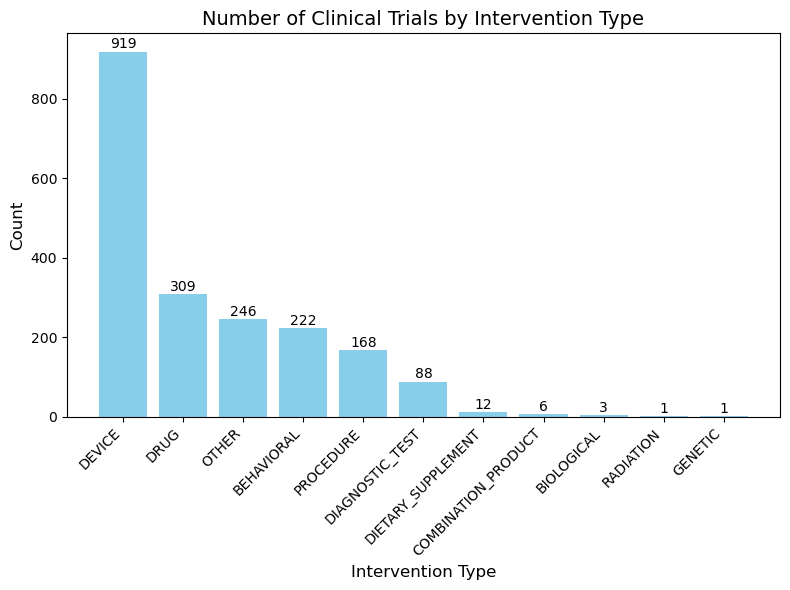

In [73]:
# Create a figure with specified size

plt.figure(figsize=(8,6))

# Plot the vertical bar chart with a color scheme

bars = plt.bar(intv_types_counts.index, intv_types_counts.values, color='skyblue')

# Add labels and title with a slightly larger font for clarity

plt.ylabel('Count', fontsize=12)
plt.xlabel('Intervention Type', fontsize=12)
plt.title('Number of Clinical Trials by Intervention Type', fontsize=14)

# Rotate the x-axis labels for better readability

plt.xticks(rotation=45, ha='right', fontsize=10)

# Add the count on top of each bar

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, int(yval), ha='center', va='bottom', fontsize=10)

# Adjust the layout to make sure everything fits well

plt.tight_layout()

# Show the plot

plt.show()

Seems like there are misclassificaions under 'OTHER', will adjust them manually back in `01-data-preprocessing.ipynb`

#### 3-5. 'Combined Outcome Measures'

#### 3-6. 'Institution Categories'

In [74]:
df['Institution Categories'].value_counts()

Institution Categories
Research Institute                                                               571
Healthcare Provider                                                              387
Solution Provider                                                                212
Healthcare Provider, Research Institute                                           82
Pharma                                                                            65
Research Institute, Healthcare Provider                                           49
Individual                                                                        41
Research Institute, Solution Provider                                             32
Solution Provider, Healthcare Provider                                            28
Healthcare Provider, Solution Provider                                            23
Government Agency                                                                 20
Research Institute, Foundation            

In [75]:
inst_cat_exploded = df['Institution Categories'].str.split(', ').explode()
inst_cat_counts = inst_cat_exploded.value_counts(ascending=False)

inst_cat_counts

Institution Categories
Research Institute     857
Healthcare Provider    649
Solution Provider      351
Pharma                 100
Individual              63
Foundation              60
Government Agency       60
Consulting & CRO        44
Name: count, dtype: int64

In [76]:
intv_types_exploded = df['Intervention Types'].str.split(', ').explode()
intv_types_counts = intv_types_exploded.value_counts(ascending=False)

print(intv_types_counts) # clinical trials numbers for each interverence

Intervention Types
DEVICE                 919
DRUG                   309
OTHER                  246
BEHAVIORAL             222
PROCEDURE              168
DIAGNOSTIC_TEST         88
DIETARY_SUPPLEMENT      12
COMBINATION_PRODUCT      6
BIOLOGICAL               3
RADIATION                1
GENETIC                  1
Name: count, dtype: int64


#### 3-7. Sex and Age

#### 3-8. Phases and Enrollment

In [77]:
df.columns

Index(['NCT Number', 'Study Title', 'Study URL', 'Study Status',
       'Brief Summary', 'Study Results', 'Conditions', 'Interventions',
       'Intervention Types', 'Primary Outcome Measures',
       'Secondary Outcome Measures', 'Other Outcome Measures',
       'Combined Outcome Measures', 'Sponsor', 'Collaborators',
       'Institution Categories', 'Sex', 'Age', 'Phases', 'Enrollment',
       'Study Type', 'Start Date', 'Completion Date', 'Last Update Posted',
       'Locations', 'Countries'],
      dtype='object')